In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
def scale(a=2, b=1):
    return np.array([[a, 0], [0, b]])

In [3]:
def rotation(alpha=np.pi/4):
    return np.array([
        [np.cos(alpha), -np.sin(alpha)],
        [np.sin(alpha),  np.cos(alpha)]
    ])

In [4]:
def circle(phi, rho=1):
    return rho*np.array([np.cos(phi), np.sin(phi)])

In [5]:
def ellipse(phi, rho, alpha, S, Xc):
    C = circle(phi, rho=rho)
    R = rotation(alpha)
    S = scale(*S)
    Xc = np.array(Xc)
    return np.dot(R, np.dot(S, C)).T + Xc

In [6]:
t = np.linspace(0, 2*np.pi, 200)
e = np.random.randn(t.size)*1e-1

In [7]:
X = ellipse(phi=t, rho=1+e, alpha=np.pi/4, S=[2, 1], Xc=[1, 1])

In [8]:
X.shape

(200, 2)

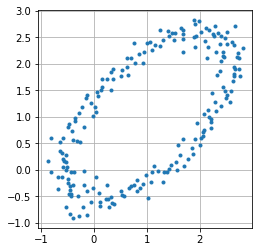

In [9]:
fig, axe = plt.subplots()
axe.plot(X[:,0], X[:,1], '.')
axe.set_aspect('equal', adjustable='box')
axe.grid()

In [10]:
def f(x, a, b, c, d, e):
    return a*x[:,0]**2 + b*x[:,0]*x[:,1] + c*x[:,1]**2 + d*x[:,0] + e*x[:,1]